In [38]:
import sys
sys.path.append('../')
sys.path.append('/Users/sdbykov/work/my_packages/nway')

In [39]:
from scripts.utils import data_path, set_mpl
from scripts.cross_match_scripts import fits_to_pandas, pandas_to_fits, assess_goodnes_nway_cross_match
import pandas as pd
import numpy as np
import seaborn as sns
import nway_python_api as nway
%matplotlib inline

# Nway run in photometric prior mode

In [40]:
magnitude_columns = [
                    ('nnmag_grzw1w2', '../1_csc-desi-photo-prior/model/nnmag_grzw1w2.csv'),
                    ('nnmag_grzw1w2w3w4', '../1_csc-desi-photo-prior/model/nnmag_grzw1w2w3w4.csv'),
                    ('mag_g', 'auto'),
                    ('mag_r', 'auto'),
                    ('mag_z', 'auto'),
                    ('mag_w1', 'auto'),
                    ('mag_w2', 'auto'),
                    ('mag_w3', 'auto'),
                    ('mag_w4', 'auto'),
                    ('col_gr', 'auto'),
                    ('col_rz', 'auto'),
                    ('col_gz', 'auto'),
                    ('col_zw1', 'auto'),
                    #('col_rw2', 'auto'),
                    #('col_w1w2', 'auto'),
                    ('col_zw3', 'auto'),
                    ('col_rw4', 'auto'),
                    ('col_w3w4', 'auto')

                    ]

ero_table = nway.table_from_fits(data_path+'ERO_lhpv_03_23_sd01_a15_g14.fits')
ero_random_table = nway.table_from_fits(data_path+'ERO_lhpv_03_23_sd01_a15_g14_shifted.fits')
desi_table = nway.table_from_fits(data_path+'desi_lh_no_nnmag_grz.fits', poserr_value=0.1, magnitude_columns=magnitude_columns)
ero_pandas = fits_to_pandas('ERO_lhpv_03_23_sd01_a15_g14.fits')
desi_pandas = fits_to_pandas('desi_lh_no_nnmag_grz.fits')

ero_ctps_pandas = pd.read_pickle(data_path+'validation_ctps_ero_desi_lh.pkl')
ero_pandas = ero_pandas.merge(ero_ctps_pandas, on='ID', how='left')

nway_args = {'match_radius':30, 'prior_completeness':1, 'magauto_post_single_minvalue':0.7 }


ero_pandas


,EROSITA,ID,RA,DEC,pos_err,ML_FLUX_0,desi_id_true_ctp
0,0,b'SRGe J103744.3+571156',159.434594,57.198788,0.802682,3.284168e-12,NaN
1,1,b'SRGe J110137.5+572926',165.406353,57.490464,0.843224,1.969860e-12,NaN
2,2,b'SRGe J105825.0+564723',164.604366,56.789762,4.574190,1.817511e-12,NaN
3,3,b'SRGe J110537.6+585120',166.406669,58.855424,0.816664,1.505411e-12,NaN
4,4,b'SRGe J102349.9+563347',155.958041,56.563186,0.797151,1.001123e-12,NaN
...,...,...,...,...,...,...,...
9495,9495,b'SRGe J102315.1+561957',155.813071,56.332561,4.828206,1.637604e-15,NaN
9496,9496,b'SRGe J102332.5+562524',155.885436,56.423270,3.936292,1.608667e-15,NaN
9497,9497,b'SRGe J102235.0+561919',155.645874,56.321872,3.697835,1.595806e-15,NaN
9498,9498,b'SRGe J102223.5+562357',155.597875,56.399058,4.029289,1.532857e-15,NaN


    adding angular separation columns
matching: 152204 matches after filtering by search radius
Primary catalogue "EROSITA" (9500), density gives 2.13e+07 objects on entire sky
Catalogue "DESI" (2418574), density gives 2.39e+09 objects on entire sky
Computing distance-based probabilities ...
    correcting for unrelated associations ...
100%|██████████| 9500/9500 [00:03<00:00, 3061.53it/s]
Incorporating bias "DESI:nnmag_grzw1w2" ...
magnitude histogramming: using user-supplied histogram for "DESI_nnmag_grzw1w2"


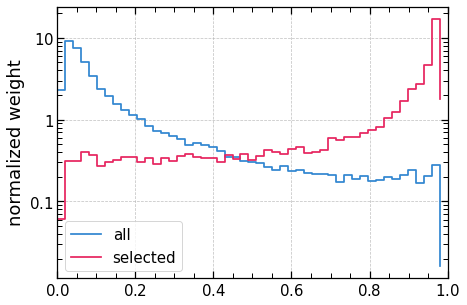

Incorporating bias "DESI:nnmag_grzw1w2w3w4" ...
magnitude histogramming: using user-supplied histogram for "DESI_nnmag_grzw1w2w3w4"


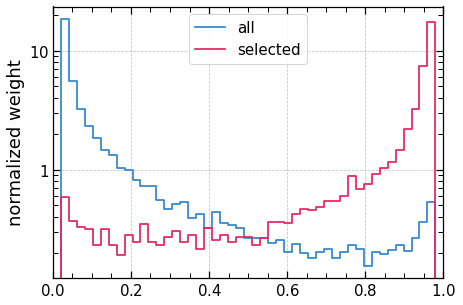

Incorporating bias "DESI:mag_g" ...
magnitude histogram of column "DESI_mag_g": 345 secure matches, 29880 insecure matches and 678464 secure non-matches of 2418574 total entries (684809 valid)


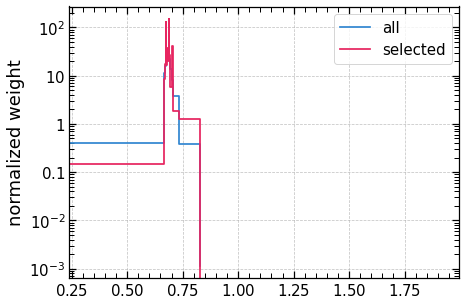

/Users/sdbykov/work/my_packages/nway/nwaylib/__init__.py:376: RuntimeWarning: divide by zero encountered in log10
  # undefined magnitudes do not contribute
Incorporating bias "DESI:mag_r" ...
magnitude histogram of column "DESI_mag_r": 385 secure matches, 29880 insecure matches and 714175 secure non-matches of 2418574 total entries (720952 valid)


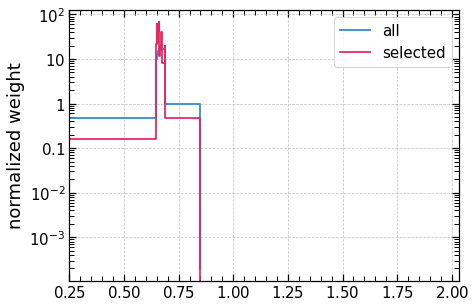

Incorporating bias "DESI:mag_z" ...
magnitude histogram of column "DESI_mag_z": 395 secure matches, 29880 insecure matches and 710931 secure non-matches of 2418574 total entries (717607 valid)


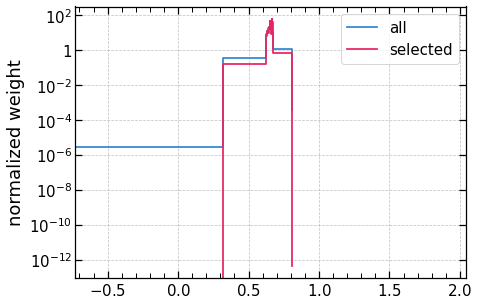

Incorporating bias "DESI:mag_w1" ...
magnitude histogram of column "DESI_mag_w1": 226 secure matches, 29880 insecure matches and 433595 secure non-matches of 2418574 total entries (437370 valid)


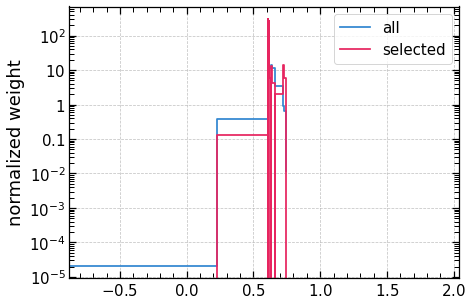

Incorporating bias "DESI:mag_w2" ...
magnitude histogram of column "DESI_mag_w2": 122 secure matches, 29880 insecure matches and 149138 secure non-matches of 2418574 total entries (150611 valid)


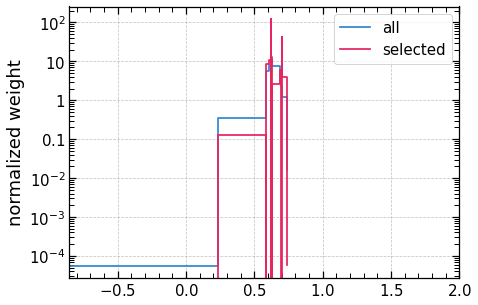

Incorporating bias "DESI:mag_w3" ...
magnitude histogram of column "DESI_mag_w3": 1326 secure matches, 29880 insecure matches and 749031 secure non-matches of 2418574 total entries (758382 valid)


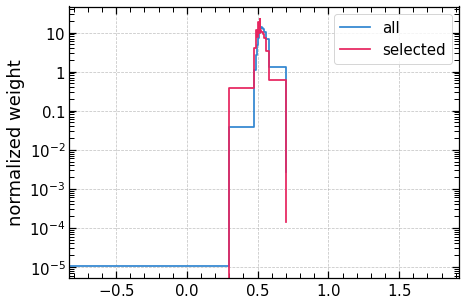

Incorporating bias "DESI:mag_w4" ...
magnitude histogram of column "DESI_mag_w4": 681 secure matches, 29880 insecure matches and 714339 secure non-matches of 2418574 total entries (721739 valid)


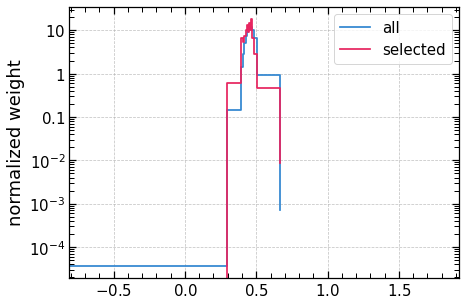

Incorporating bias "DESI:col_gr" ...
magnitude histogram of column "DESI_col_gr": 328 secure matches, 29880 insecure matches and 671015 secure non-matches of 2418574 total entries (677269 valid)


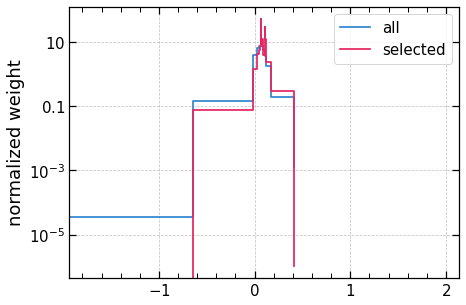

Incorporating bias "DESI:col_rz" ...
magnitude histogram of column "DESI_col_rz": 367 secure matches, 29880 insecure matches and 699303 secure non-matches of 2418574 total entries (705842 valid)


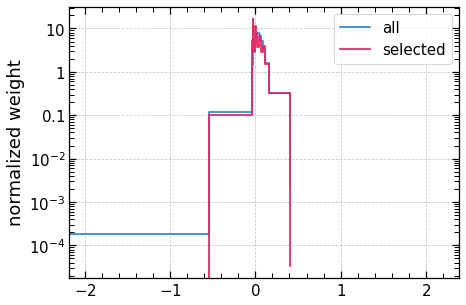

Incorporating bias "DESI:col_gz" ...
magnitude histogram of column "DESI_col_gz": 324 secure matches, 29880 insecure matches and 663801 secure non-matches of 2418574 total entries (669900 valid)


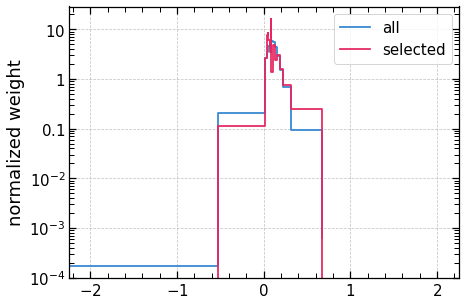

Incorporating bias "DESI:col_zw1" ...
magnitude histogram of column "DESI_col_zw1": 213 secure matches, 29880 insecure matches and 426788 secure non-matches of 2418574 total entries (430457 valid)


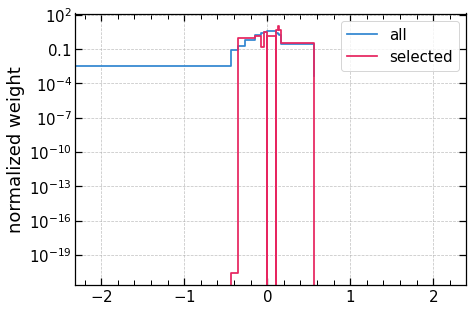

Incorporating bias "DESI:col_zw3" ...
magnitude histogram of column "DESI_col_zw3": 1313 secure matches, 29880 insecure matches and 742440 secure non-matches of 2418574 total entries (751679 valid)


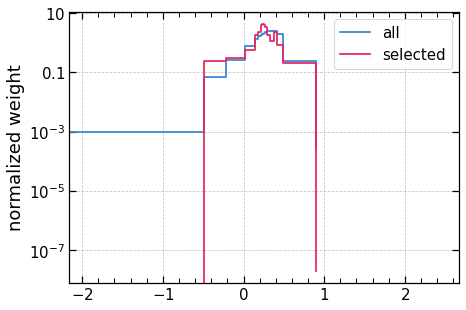

Incorporating bias "DESI:col_rw4" ...
magnitude histogram of column "DESI_col_rw4": 658 secure matches, 29880 insecure matches and 708553 secure non-matches of 2418574 total entries (715881 valid)


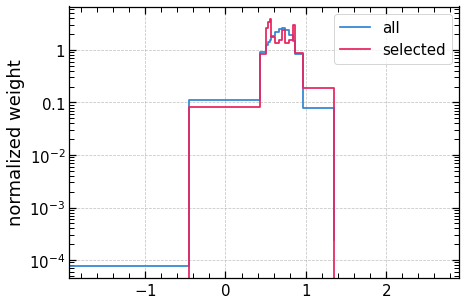

Incorporating bias "DESI:col_w3w4" ...
magnitude histogram of column "DESI_col_w3w4": 103 secure matches, 29880 insecure matches and 149032 secure non-matches of 2418574 total entries (150529 valid)


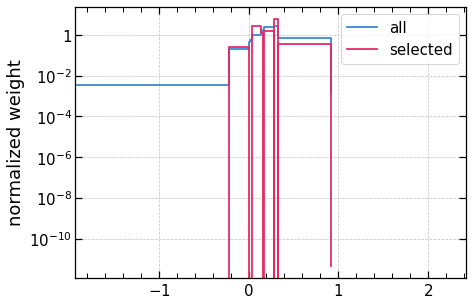


Computing final probabilities ...
    grouping by primary catalogue ID and flagging ...


In [41]:

nway_res_ero = nway.nwaylib.nway_match(
[ero_table, desi_table],
**nway_args
)


    adding angular separation columns
matching: 112369 matches after filtering by search radius
Primary catalogue "EROSITA" (8175), density gives 1.83e+07 objects on entire sky
Catalogue "DESI" (2418574), density gives 2.39e+09 objects on entire sky
Computing distance-based probabilities ...
    correcting for unrelated associations ...
100%|██████████| 8175/8175 [00:02<00:00, 3315.12it/s]
Incorporating bias "DESI:nnmag_grzw1w2" ...
magnitude histogramming: using user-supplied histogram for "DESI_nnmag_grzw1w2"


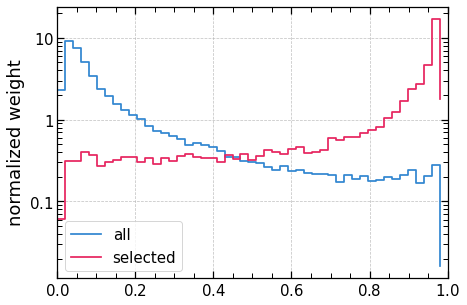

Incorporating bias "DESI:nnmag_grzw1w2w3w4" ...
magnitude histogramming: using user-supplied histogram for "DESI_nnmag_grzw1w2w3w4"


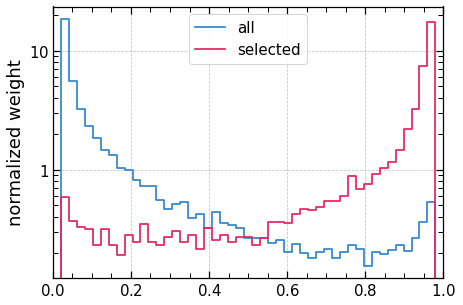

Incorporating bias "DESI:mag_g" ...
magnitude histogram of column "DESI_mag_g": 208 secure matches, 15650 insecure matches and 680413 secure non-matches of 2418574 total entries (684809 valid)


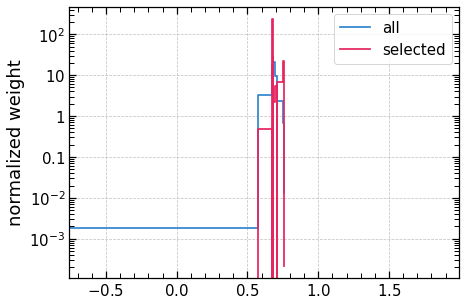

/Users/sdbykov/work/my_packages/nway/nwaylib/__init__.py:376: RuntimeWarning: divide by zero encountered in log10
  # undefined magnitudes do not contribute
Incorporating bias "DESI:mag_r" ...
magnitude histogram of column "DESI_mag_r": 224 secure matches, 15650 insecure matches and 716309 secure non-matches of 2418574 total entries (720952 valid)


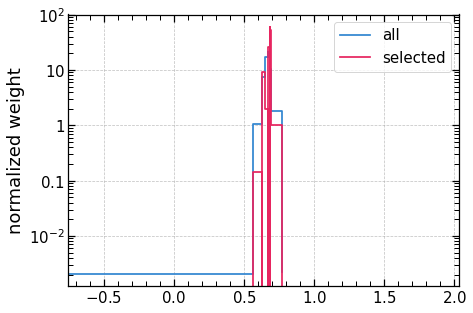

Incorporating bias "DESI:mag_z" ...
magnitude histogram of column "DESI_mag_z": 222 secure matches, 15650 insecure matches and 712979 secure non-matches of 2418574 total entries (717607 valid)


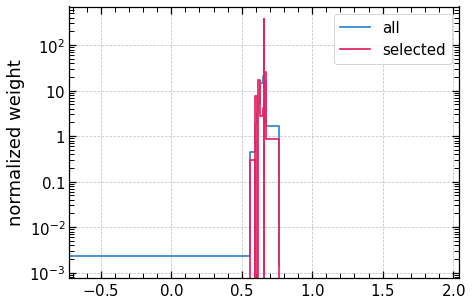

Incorporating bias "DESI:mag_w1" ...
magnitude histogram of column "DESI_mag_w1": 148 secure matches, 15650 insecure matches and 434542 secure non-matches of 2418574 total entries (437370 valid)


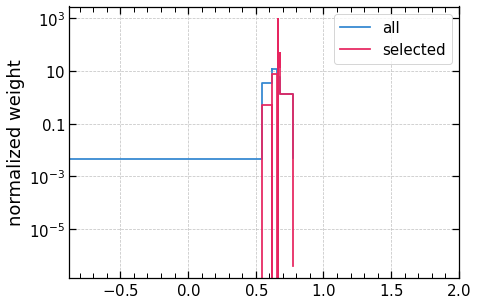

Incorporating bias "DESI:mag_w2" ...
magnitude histogram of column "DESI_mag_w2": 44 secure matches, 15650 insecure matches and 149594 secure non-matches of 2418574 total entries (150611 valid)


UndersampledException: ERROR: too few secure matches (44) to make a good histogram. If you are sure you want to use this poorly sampled histogram, replace "auto" with the filename. You can also decrease the mag-auto-minprob parameter.

In [42]:

nway_res_ero_random = nway.nwaylib.nway_match(
[ero_random_table, desi_table],
**nway_args
)

In [ ]:
cutoffs, _, nway_purity = nway.calibrate_cutoff(nway_res_ero, nway_res_ero_random)
#plt.figure(figsize=(10,10))
#nway_res_ero.prob_has_match.hist(bins=100, alpha = 0.4)
#nway_res_ero_random.prob_has_match.hist(bins=100, alpha = 0.4)

## Asses the performance of the NWAY with validation catalog (CSC & XMM)

In [43]:
nway_res_ero  = nway_res_ero.merge(ero_pandas, on='EROSITA')
nway_res_ero  = nway_res_ero.merge(desi_pandas, on='DESI')
nway_res_ero.sort_values(by=['EROSITA', 'prob_this_match' ], inplace=True, ascending=[True, False])
#nway_res_ero.to_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14_nway.pkl')

NWAY PERFOMANCE ON THE VALIDATION CATALOG
Completeness and purity for nway matching 
completeness = fraction of sources with prob_has_match > p 
purity = fraction of sources with prob_has_match > p and correct nway assignment
 Completeness = 95% 
 Purity = 95% 
 prob_has_match optimal cutoff =  0.41 
 Fraction of sources with prob_has_match > 0.41 = 81%
+++Statistics+++
687 X-ray sources in validation set with counterparts
--Out of those, 37 sources were assigned hostless (prob_has_match < 0.41) 
650 sources have prob_has_match > 0.41
Out of those 650: 
--615 sources have correct nway counterpart
--35 sources have incorrect nway counterpart


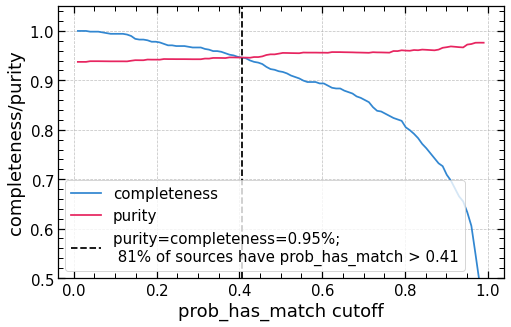

In [44]:
validation_df, p_any_cutoff = assess_goodnes_nway_cross_match(nway_res_ero)